<a href="https://colab.research.google.com/github/taylorvroman09/Taylor-Public/blob/main/Day17_Notes_perceptron_f21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 17 Notes (Fall 2021)

Perceptron and SGD

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
iris_data = pandas.read_csv('/content/drive/MyDrive/MachineLearning/irisData.csv')

Mounted at /content/drive


In [2]:
#create dummy variables for species in Iris data
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
iris_dummies.head()

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [3]:
### use a Perceptron to predict if an iris is a Setosa

import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-setosa"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))


####because they're linearly separable####

Setosa accuracy: 1.0


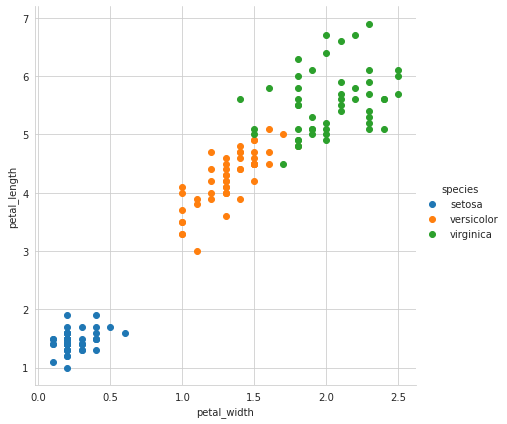

In [4]:
#let's take a look at the data:
import seaborn as sns
import matplotlib.pyplot as plt
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend()


# In class Exercise 1:
- Given the example for species_Iris-setosa, how does Perceptron do for:
  - species_Iris-virginica
  - species_Iris-versicolor
- Do you expect these to also give 100% accuracy? Why or why not?


NO because they're not all linearly separable


In [5]:
# Code for testing the accuracy of species_Iris-virginica using a Perceptron
### use a Perceptron to predict if an iris is a virginica

import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-virginica"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Virginica accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))



Virginica accuracy: 0.6666666666666666


In [6]:
# Code for testing the accuracy of species_Iris-versicolor using a Perceptron
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-versicolor"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Versicolor accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

Versicolor accuracy: 0.6333333333333333


# Boston Housing Dataset:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [21]:
#Boston Housing Data

from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas
data = pandas.read_csv('/content/drive/MyDrive/MachineLearning/boston_housing.csv') 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


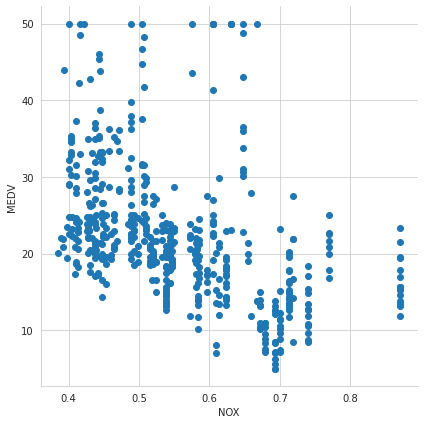

In [9]:
## Play around with plotting different predictor variables
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(data,height = 6).map(plt.scatter,'NOX','MEDV')

# In-class Exercise 2:
- Find a Gradient Descent Algorithm on scikit-learn
  - Hint: Stochastic Gradient Descent (SGD)
- Apply it to the Boston Housing Market Dataset
- Utilize a metric to determine how well the algorithm is doing
- Consider reading the user's guide if the results don't make sense
- Can you plot the results of the MSE v Epochs?

In [25]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor

predictors = data.columns.drop('MEDV')
target = 'MEDV'

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
sgd = SGDRegressor()
sgd.fit(train_data,train_sln)
medv_sgd_predictions = sgd.predict(test_data)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))

SGD Regression R2: -5.798982509219639e+24
SGD Regression MAE: 13470196316606.08
SGD Regression MSE: 2.692521087519807e+26


In [26]:
# Code using SGD on Boston Housing Dataset:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#load up scikit-learn Perceptron
sgd = SGDRegressor()
sgd.fit(train_data_normalized,train_sln)
medv_sgd_predictions = sgd.predict(test_data_normalized)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))

SGD Regression R2: 0.5252658311448934
SGD Regression MAE: 3.4028882098125446
SGD Regression MSE: 22.04234550761859


KeyError: ignored

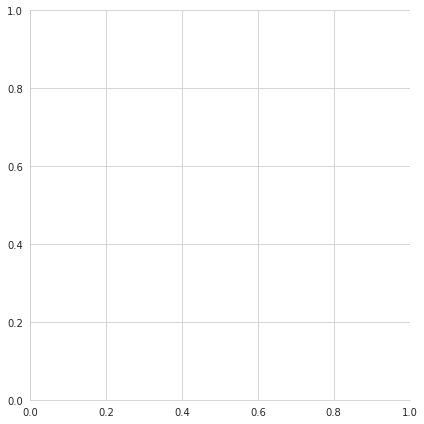

In [14]:
# Plot the results of the MSE v Epochs
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(data,height = 6).map(plt.scatter,'MSE','Epochs')